**Assignment 2 - Naive Bayes and Logistic Regression**

**Group Description**

- Group Number: 3
- Member 1
  - Student Name: Meet Mehta
  - Student Number: 300261159
- Member 2
  - Student Name: Rakshita Mathur
  - Student Number: 300215340


**Importing the libraries**

In [ ]:
# Importing necessary libraries

import io
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import StandardScaler


**1. Reading the dataset**

In [ ]:
# Dataset URL
url_16p = "https://raw.githubusercontent.com/rakshita003/Datasets/main/16P.csv"

# Define a custom encoding function to handle encoding issues
def custom_encoding(text):
    try:
        return text.encode('utf-8').decode('utf-8', 'ignore')
    except AttributeError:
        return text

# Fetching data from URL
response_16p = requests.get(url_16p)

#Reading the data from the CSV file
dataset = pd.read_csv(io.StringIO(response_16p.text), encoding='utf-8').applymap(custom_encoding)

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [ ]:
# defining the mapping of personalities on the basis of given data
personality_mapping = {
    'ESTJ': 0,
    'ENTJ': 1,
    'ESFJ': 2,
    'ENFJ': 3,
    'ISTJ': 4,
    'ISFJ': 5,
    'INTJ': 6,
    'INFJ': 7,
    'ESTP': 8,
    'ESFP': 9,
    'ENTP': 10,
    'ENFP': 11,
    'ISTP': 12,
    'ISFP': 13,
    'INTP': 14,
    'INFP': 15
}


In [ ]:
# Exploring the Dataset

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 



---



**2. Pre-processing Dataset**

In [ ]:
X = dataset.drop('Personality', axis =1)
y = dataset['Personality']

In [ ]:
#encoding y-axis
dataset['Personality'] = dataset['Personality'].map(personality_mapping)



---



**3.Naïve Bayes**

- **3.1 Naïve Bayes with K-Fold Using GaussianNB - Default Parameter**

In [ ]:
# Splitting the data using 4-Fold Cross Validation
kf = KFold(n_splits=4)

accuracy_scores = []

#Dropping the personality column
X = dataset.drop('Personality', axis =1)

#Counter Varaible to keep track of each fold
k =1

for train_index, test_index in kf.split(dataset):
  # Split the data into training and testing sets based on the current fold
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = dataset['Personality'].iloc[train_index], dataset['Personality'].iloc[test_index]

  #defining the classifier
  naive_bayes_classifier = GaussianNB()
  naive_bayes_classifier.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = naive_bayes_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  # Print accuracy for the current iteration
  print(f"Accuracy in iteration {k} is {accuracy* 100:.2f}%")
  k +=1

  # Append the accuracy to the list
  accuracy_scores.append(accuracy)

#finding the mean accuracy
avg_acc = sum(accuracy_scores) / len(accuracy_scores)


print(f'Average accuracy : {avg_acc * 100:.2f}%')


Accuracy in iteration 1 is 91.35%
Accuracy in iteration 2 is 91.00%
Accuracy in iteration 3 is 91.09%
Accuracy in iteration 4 is 90.73%
Average accuracy : 91.04%




---



**3.2 Naïve Bayes with K-Fold Using GaussianNB - Hyper Parameter Tuned - Custom Prior**

Accuracy in iteration 1 is 90.22%
Accuracy in iteration 2 is 90.12%
Accuracy in iteration 3 is 90.25%
Accuracy in iteration 4 is 89.73%
Mean Test Accuracy: 90.08%

Confusion Matrix for Test Data:


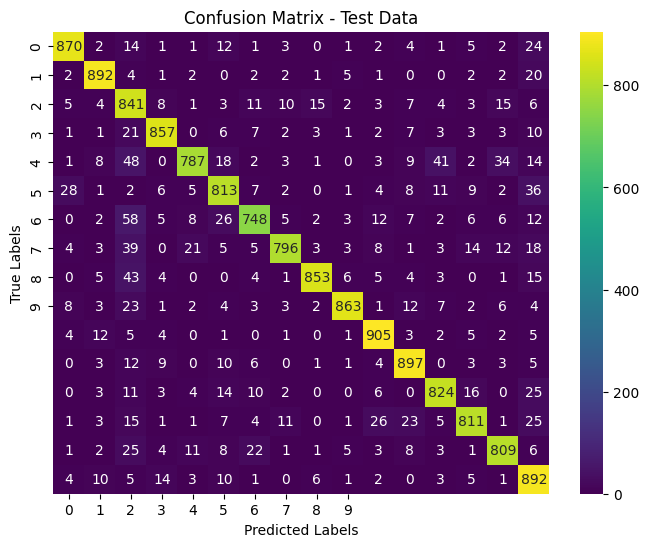


Test Accuracy: 89.73%
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       943
           1       0.94      0.95      0.94       936
           2       0.72      0.90      0.80       938
           3       0.93      0.92      0.93       927
           4       0.93      0.81      0.87       971
           5       0.87      0.87      0.87       935
           6       0.90      0.83      0.86       902
           7       0.95      0.85      0.90       935
           8       0.96      0.90      0.93       944
           9       0.97      0.91      0.94       944
          10       0.92      0.95      0.93       950
          11       0.91      0.94      0.92       954
          12       0.90      0.90      0.90       918
          13       0.91      0.87      0.89       935
          14       0.90      0.89      0.89       910
          15       0.80      0.93      0.86       957

    accuracy        

In [ ]:
#Defining the custom priors. We are defining the custom prior to create a bias for each personality. Please note that the bias are assigned randomly to each personality
custom_priors = [0.05, 0.1, 0.15, 0.05, 0.025, 0.05, 0.025, 0.025, 0.025, 0.025, 0.15, 0.05, 0.025, 0.05, 0.025, 0.025]

# Calculating the sum of custom priors (will be equal to 1)
sum_of_priors = sum(custom_priors)

# Since the sum was not exactly one, we are rounding it to 1
if not np.isclose(sum_of_priors, 1.0):
    diff = 1.0 - sum_of_priors
    custom_priors[-1] += diff

naive_bayes_classifier2 = GaussianNB(priors=custom_priors)

kf = KFold(n_splits=4)

# Counter variable to keep track of each iteration
k = 1

# Initialize lists to store accuracy and confusion matrices for each fold
accuracies = []
confusion_matrices = []

# Iterate through each fold
for train_index, test_index in kf.split(dataset):
    # Split the data into training and testing sets based on the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = dataset['Personality'].iloc[train_index], dataset['Personality'].iloc[test_index]

    # Fit the classifier for this fold with custom priors
    naive_bayes_classifier2.fit(X_train, y_train)

    # Make predictions on the test data for this fold
    y_pred = naive_bayes_classifier2.predict(X_test)

    # Evaluate the classifier for this fold
    accuracy_fold = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy_fold)

    # Store the confusion matrix of this fold with a different variable name
    confusion_fold = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion_fold)

    print(f"Accuracy in iteration {k} is {accuracy_fold * 100:.2f}%")
    k += 1

# Calculating the mean accuracy for all folds
mean_accuracy = np.mean(accuracies)

# Printing the mean accuracy
print(f'Mean Test Accuracy: {mean_accuracy * 100:.2f}%')
print()

# Make predictions on the test data
y_pred_test = naive_bayes_classifier2.predict(X_test)

# Evaluating the classifier on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Plot the confusion matrix for the test data
print("Confusion Matrix for Test Data:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test, annot=True, fmt='d', cmap='viridis',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Data')
plt.show()
print()

print(f'Test Accuracy: {accuracy_test * 100:.2f}%')
print("Classification Report for Test Data:")
print(classification_rep_test)



---



- **3.3 Naïve Bayes with K-Fold Using GaussianNB - Hyper Parameter Changed - Feature Scaling**

In [ ]:
# Splitting the data using 4-Fold Cross Validation
kf = KFold(n_splits=4)

accuracy_scores = []

# Dropping the personality column
X = dataset.drop('Personality', axis=1)

# Counter Variable to keep track of each fold
k = 1

for train_index, test_index in kf.split(dataset):
    # Split the data into training and testing sets based on the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = dataset['Personality'].iloc[train_index], dataset['Personality'].iloc[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Defining the classifier
    naive_bayes_classifier = GaussianNB()
    naive_bayes_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = naive_bayes_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy for the current iteration
    print(f"Accuracy in iteration {k} is {accuracy * 100:.2f}%")
    k += 1

    # Append the accuracy to the list
    accuracy_scores.append(accuracy)

# Finding the mean accuracy
avg_acc = sum(accuracy_scores) / len(accuracy_scores)

print(f'Average accuracy : {avg_acc * 100:.2f}%')



Accuracy in iteration 1 is 91.21%
Accuracy in iteration 2 is 91.05%
Accuracy in iteration 3 is 91.17%
Accuracy in iteration 4 is 90.59%
Average accuracy : 91.00%




---



**4. Logistic Regression**

**4.1 Variation-1: Hyperparameter-tuned Logistic Regression with K-Fold Cross-Validation**

In this section, a logistic regression model is created with the following hyperparameters:

- `max_iter`: Maximum number of iterations for the solver (set to 1000).
- `solver`: The solver used for optimization (set to 'lbfgs').

The code illustrates the process of logistic regression modeling, cross-validation, and hyperparameter tuning to predict personality types and assess model performance.





Accuracy in iteration 1 is 87.23%

Confusion Matrix (Iteration 1)


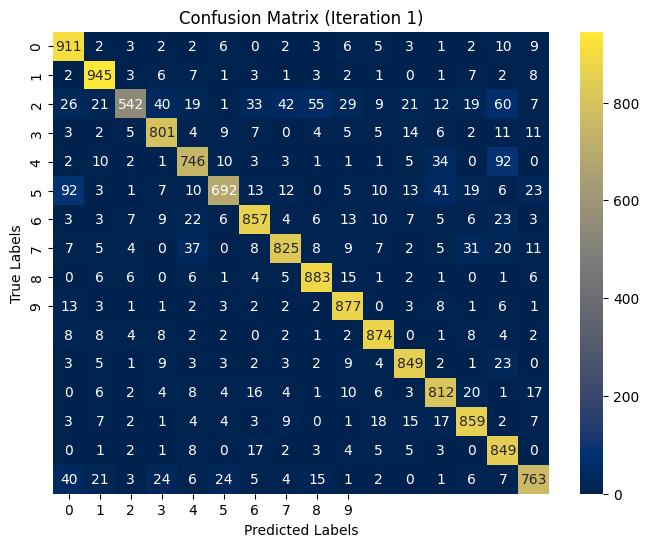


Classification Report (Iteration 1):
             precision recall f1-score   support
0                 0.82   0.94     0.88    967.00
1                 0.90   0.95     0.93    992.00
2                 0.92   0.58     0.71    936.00
3                 0.88   0.90     0.89    889.00
4                 0.84   0.82     0.83    911.00
5                 0.90   0.73     0.81    947.00
6                 0.88   0.87     0.88    984.00
7                 0.90   0.84     0.87    979.00
8                 0.89   0.94     0.92    937.00
9                 0.89   0.95     0.92    925.00
10                0.91   0.94     0.93    926.00
11                0.90   0.92     0.91    919.00
12                0.85   0.89     0.87    914.00
13                0.88   0.90     0.89    952.00
14                0.76   0.94     0.84    900.00
15                0.88   0.83     0.85    922.00
accuracy          0.87   0.87     0.87      0.87
macro avg         0.88   0.87     0.87  15000.00
weighted avg      0.88   0.87  

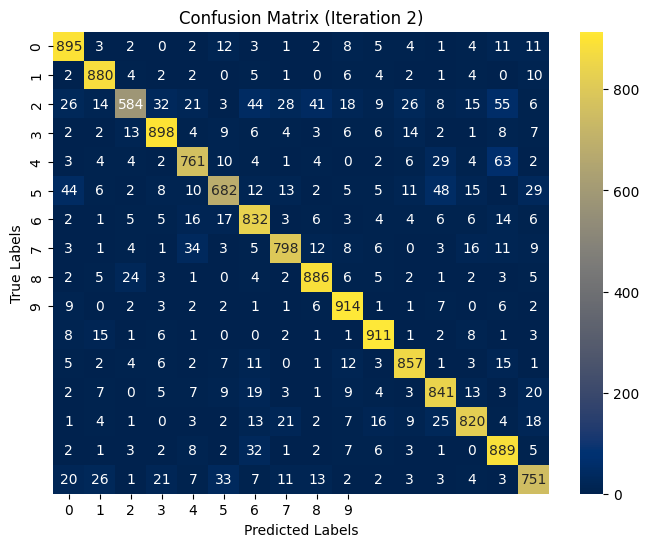


Classification Report (Iteration 2):
             precision recall f1-score   support
0                 0.87   0.93     0.90    964.00
1                 0.91   0.95     0.93    923.00
2                 0.89   0.63     0.74    930.00
3                 0.90   0.91     0.91    985.00
4                 0.86   0.85     0.86    899.00
5                 0.86   0.76     0.81    893.00
6                 0.83   0.89     0.86    930.00
7                 0.90   0.87     0.88    914.00
8                 0.90   0.93     0.92    951.00
9                 0.90   0.96     0.93    957.00
10                0.92   0.95     0.93    961.00
11                0.91   0.92     0.91    930.00
12                0.86   0.89     0.87    946.00
13                0.90   0.87     0.88    946.00
14                0.82   0.92     0.87    964.00
15                0.85   0.83     0.84    907.00
accuracy          0.88   0.88     0.88      0.88
macro avg         0.88   0.88     0.88  15000.00
weighted avg      0.88   0.88  

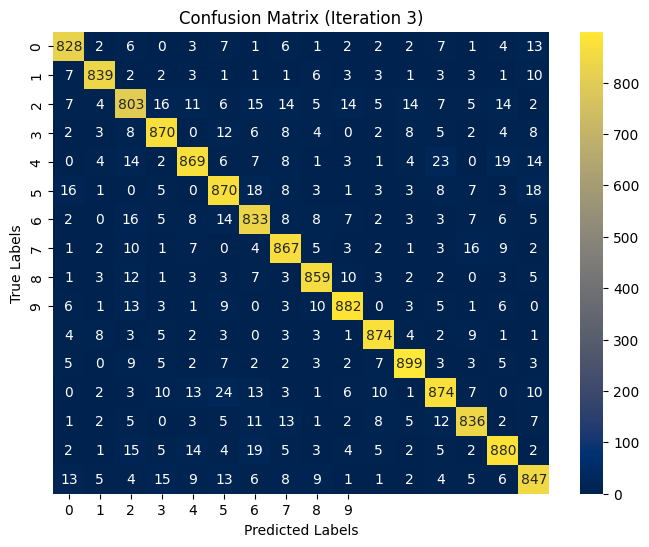


Classification Report (Iteration 3):
             precision recall f1-score   support
0                 0.93   0.94     0.93    885.00
1                 0.96   0.95     0.95    886.00
2                 0.87   0.85     0.86    942.00
3                 0.92   0.92     0.92    942.00
4                 0.92   0.89     0.90    975.00
5                 0.88   0.90     0.89    964.00
6                 0.88   0.90     0.89    927.00
7                 0.90   0.93     0.92    933.00
8                 0.93   0.94     0.93    917.00
9                 0.94   0.94     0.94    943.00
10                0.94   0.95     0.94    923.00
11                0.94   0.94     0.94    957.00
12                0.90   0.89     0.90    977.00
13                0.92   0.92     0.92    913.00
14                0.91   0.91     0.91    968.00
15                0.89   0.89     0.89    948.00
accuracy          0.92   0.92     0.92      0.92
macro avg         0.92   0.92     0.92  15000.00
weighted avg      0.92   0.92  

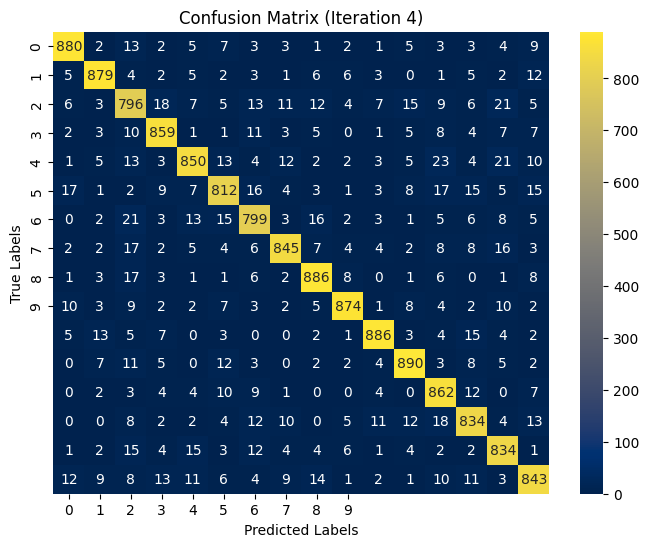


Classification Report (Iteration 4):
             precision recall f1-score   support
0                 0.93   0.93     0.93    943.00
1                 0.94   0.94     0.94    936.00
2                 0.84   0.85     0.84    938.00
3                 0.92   0.93     0.92    927.00
4                 0.92   0.88     0.90    971.00
5                 0.90   0.87     0.88    935.00
6                 0.88   0.89     0.88    902.00
7                 0.93   0.90     0.92    935.00
8                 0.92   0.94     0.93    944.00
9                 0.95   0.93     0.94    944.00
10                0.95   0.93     0.94    950.00
11                0.93   0.93     0.93    954.00
12                0.88   0.94     0.91    918.00
13                0.89   0.89     0.89    935.00
14                0.88   0.92     0.90    910.00
15                0.89   0.88     0.89    957.00
accuracy          0.91   0.91     0.91      0.91
macro avg         0.91   0.91     0.91  14999.00
weighted avg      0.91   0.91  

In [ ]:
kf = KFold(n_splits=4)

accuracy_scores_logisticRegression1 = []

X = dataset.drop('Personality', axis=1)
k = 1

for train_index, test_index in kf.split(dataset):
    # Split the data into training and testing sets based on the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = dataset['Personality'].iloc[train_index], dataset['Personality'].iloc[test_index]

    # Create a logistic regression model
    logisticRegression1 = LogisticRegression(max_iter=1000, solver='lbfgs')

    # Fit the logistic regression model to the training data
    logisticRegression1.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = logisticRegression1.predict(X_test)

    # Calculate accuracy for the current fold
    accuracy_logisticRegression1 = accuracy_score(y_test, y_pred)

    # Print accuracy for the current iteration
    print(f"Accuracy in iteration {k} is {accuracy_logisticRegression1 * 100:.2f}%")
    print()


    accuracy_scores_logisticRegression1.append(accuracy_logisticRegression1)


    conf_matrix1 = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix
    print(f'Confusion Matrix (Iteration {k})')
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='cividis',
                xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.show()
    print()


    class_report1 = classification_report(y_test, y_pred, output_dict=True)
    class_report_df1 = pd.DataFrame(class_report1).transpose()  # Convert to a DataFrame
    class_report_df1 = class_report_df1.applymap(lambda x: f'{x:.2f}' if isinstance(x, (float, int)) else x)  # Format to 2 decimal places
    # Print the classification report
    print(f'Classification Report (Iteration {k}):')
    print(class_report_df1)
    print()
    k += 1


avg_acc_logisticRegression1 = sum(accuracy_scores_logisticRegression1) / len(accuracy_scores_logisticRegression1)

# Print the average accuracy
print(f'Average accuracy : {avg_acc_logisticRegression1 * 100:.2f}%')





---




- **4.2 Variation-2: Hyperparameter-tuned Logistic Regression with K-Fold Cross-Validation**

Logistic regression model is created with the following hyperparameters:

- `max_iter`: Maximum number of iterations for the solver (set to 1000).
- `solver`: The solver used for optimization (set to 'liblinear').
- `C`: Inverse of regularization strength (set to 0.1, controlling the trade-off between fitting to the training data and regularization).
- `class_weight`: Class weights are set to 'balanced' to handle class imbalance.
- `penalty`: The penalty term for the logistic regression model is set to 'l1' for L1 regularization.

This code essentially demonstrates the process of building a logistic regression model, training it, making predictions, and evaluating its performance using accuracy, a confusion matrix, and a classification report. It also visualizes the confusion matrix using a heatmap.

Accuracy in iteration 1 is 91.39%

Confusion Matrix (Iteration 1)


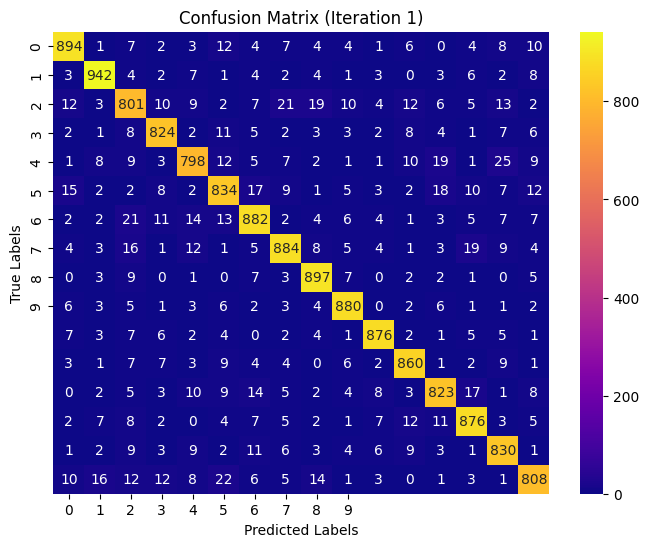


Classification Report (Iteration 1):
             precision recall f1-score   support
0                 0.93   0.92     0.93    967.00
1                 0.94   0.95     0.95    992.00
2                 0.86   0.86     0.86    936.00
3                 0.92   0.93     0.92    889.00
4                 0.90   0.88     0.89    911.00
5                 0.89   0.88     0.88    947.00
6                 0.90   0.90     0.90    984.00
7                 0.91   0.90     0.91    979.00
8                 0.92   0.96     0.94    937.00
9                 0.94   0.95     0.94    925.00
10                0.95   0.95     0.95    926.00
11                0.92   0.94     0.93    919.00
12                0.91   0.90     0.91    914.00
13                0.92   0.92     0.92    952.00
14                0.89   0.92     0.91    900.00
15                0.91   0.88     0.89    922.00
accuracy          0.91   0.91     0.91      0.91
macro avg         0.91   0.91     0.91  15000.00
weighted avg      0.91   0.91  

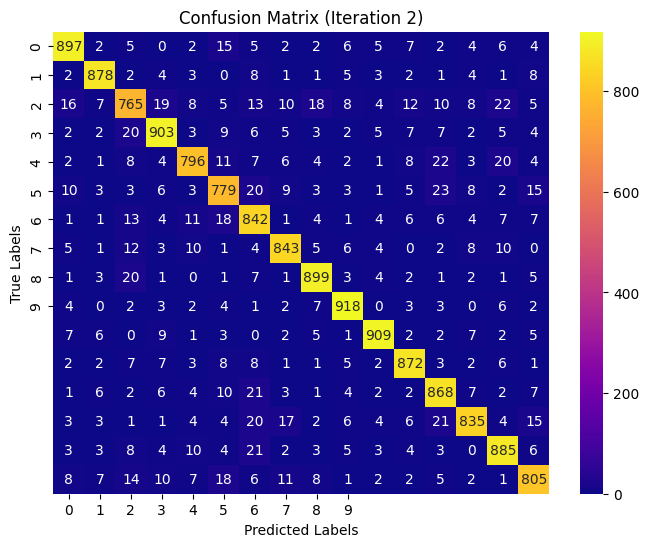


Classification Report (Iteration 2):
             precision recall f1-score   support
0                 0.93   0.93     0.93    964.00
1                 0.95   0.95     0.95    923.00
2                 0.87   0.82     0.84    930.00
3                 0.92   0.92     0.92    985.00
4                 0.92   0.89     0.90    899.00
5                 0.88   0.87     0.87    893.00
6                 0.85   0.91     0.88    930.00
7                 0.92   0.92     0.92    914.00
8                 0.93   0.95     0.94    951.00
9                 0.94   0.96     0.95    957.00
10                0.95   0.95     0.95    961.00
11                0.93   0.94     0.93    930.00
12                0.89   0.92     0.90    946.00
13                0.93   0.88     0.91    946.00
14                0.90   0.92     0.91    964.00
15                0.90   0.89     0.89    907.00
accuracy          0.91   0.91     0.91      0.91
macro avg         0.91   0.91     0.91  15000.00
weighted avg      0.91   0.91  

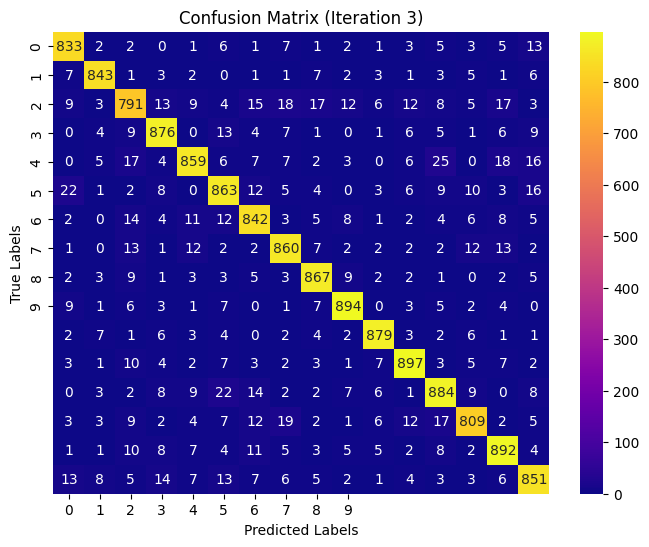


Classification Report (Iteration 3):
             precision recall f1-score   support
0                 0.92   0.94     0.93    885.00
1                 0.95   0.95     0.95    886.00
2                 0.88   0.84     0.86    942.00
3                 0.92   0.93     0.92    942.00
4                 0.92   0.88     0.90    975.00
5                 0.89   0.90     0.89    964.00
6                 0.90   0.91     0.90    927.00
7                 0.91   0.92     0.91    933.00
8                 0.93   0.95     0.94    917.00
9                 0.94   0.95     0.94    943.00
10                0.95   0.95     0.95    923.00
11                0.93   0.94     0.93    957.00
12                0.90   0.90     0.90    977.00
13                0.92   0.89     0.90    913.00
14                0.91   0.92     0.91    968.00
15                0.90   0.90     0.90    948.00
accuracy          0.92   0.92     0.92      0.92
macro avg         0.92   0.92     0.92  15000.00
weighted avg      0.92   0.92  

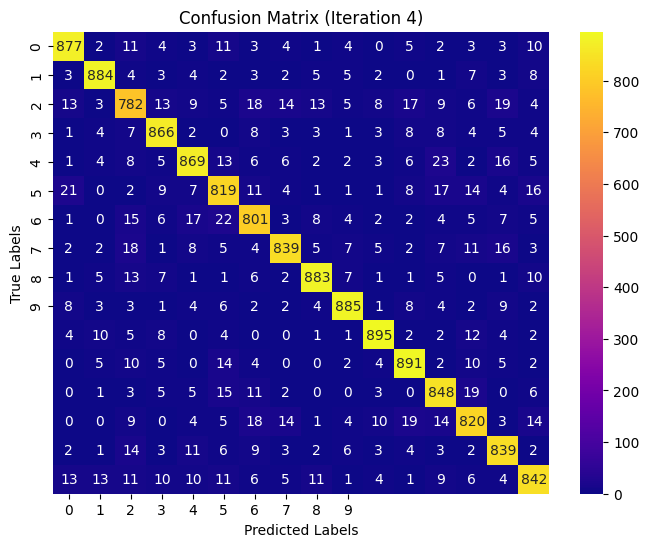


Classification Report (Iteration 4):
             precision recall f1-score   support
0                 0.93   0.93     0.93    943.00
1                 0.94   0.94     0.94    936.00
2                 0.85   0.83     0.84    938.00
3                 0.92   0.93     0.92    927.00
4                 0.91   0.89     0.90    971.00
5                 0.87   0.88     0.87    935.00
6                 0.88   0.89     0.88    902.00
7                 0.93   0.90     0.91    935.00
8                 0.94   0.94     0.94    944.00
9                 0.95   0.94     0.94    944.00
10                0.95   0.94     0.94    950.00
11                0.91   0.93     0.92    954.00
12                0.89   0.92     0.90    918.00
13                0.89   0.88     0.88    935.00
14                0.89   0.92     0.91    910.00
15                0.90   0.88     0.89    957.00
accuracy          0.91   0.91     0.91      0.91
macro avg         0.91   0.91     0.91  14999.00
weighted avg      0.91   0.91  

In [ ]:
kf = KFold(n_splits=4)

accuracy_scores_logisticRegression2 = []

X = dataset.drop('Personality', axis=1)
k = 1

for train_index, test_index in kf.split(dataset):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = dataset['Personality'].iloc[train_index], dataset['Personality'].iloc[test_index]

    # Create a logistic regression model
    logisticRegression2 = LogisticRegression(max_iter=1000, solver='liblinear', C=0.1, class_weight='balanced', penalty='l1')

    # Fit the logistic regression model to the training data
    logisticRegression2.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = logisticRegression2.predict(X_test)

    accuracy_logisticRegression2 = accuracy_score(y_test, y_pred)

    # Print accuracy for the current iteration
    print(f"Accuracy in iteration {k} is {accuracy_logisticRegression2 * 100:.2f}%")
    print()

    accuracy_scores_logisticRegression2.append(accuracy_logisticRegression2)

    conf_matrix2 = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix
    print(f'Confusion Matrix (Iteration {k})')
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='plasma',
                xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.show()
    print()

    class_report2 = classification_report(y_test, y_pred, output_dict=True)
    class_report_df2 = pd.DataFrame(class_report2).transpose()  # Convert to a DataFrame
    class_report_df2 = class_report_df2.applymap(lambda x: f'{x:.2f}' if isinstance(x, (float, int)) else x)  # Format to 2 decimal places
    # Print the classification report
    print(f'Classification Report (Iteration {k}):')
    print(class_report_df2)
    print()
    k += 1

avg_acc_logisticRegression2 = sum(accuracy_scores_logisticRegression2) / len(accuracy_scores_logisticRegression2)

# Print the average accuracy
print(f'Average accuracy : {avg_acc_logisticRegression2 * 100:.2f}%')




---



- **4.3 Variation-3: Hyperparameter-tuned Logistic Regression with K-Fold Cross-Validation**


 A logistic regression model is created with specific hyperparameters, including:

 - `max_iter`: Maximum number of iterations for the solver (set to 1000).
 - `solver`: The solver used for optimization (set to 'lbfgs').
 - `C`: Inverse of regularization strength (set to 1.0, controlling the trade-off between fitting to the training data and regularization).
 - `class_weight`: Class weights are set to 'balanced' to handle class imbalance.

This code demonstrates the process of building a logistic regression model, training it, making predictions, and evaluating its performance using accuracy, a confusion matrix, and a classification report. It also visualizes the confusion matrix using a heatmap.

Accuracy in iteration 1 is 87.28%

Confusion Matrix (Iteration 1)


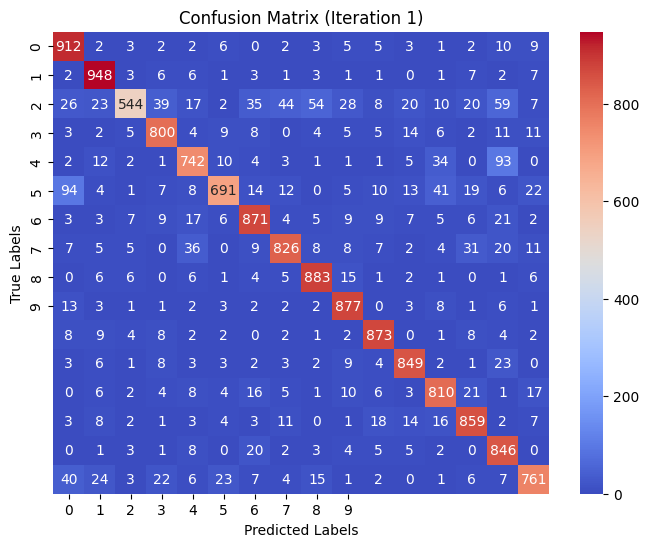


Classification Report (Iteration 1):
             precision recall f1-score   support
0                 0.82   0.94     0.88    967.00
1                 0.89   0.96     0.92    992.00
2                 0.92   0.58     0.71    936.00
3                 0.88   0.90     0.89    889.00
4                 0.85   0.81     0.83    911.00
5                 0.90   0.73     0.81    947.00
6                 0.87   0.89     0.88    984.00
7                 0.89   0.84     0.87    979.00
8                 0.90   0.94     0.92    937.00
9                 0.89   0.95     0.92    925.00
10                0.91   0.94     0.93    926.00
11                0.90   0.92     0.91    919.00
12                0.86   0.89     0.87    914.00
13                0.87   0.90     0.89    952.00
14                0.76   0.94     0.84    900.00
15                0.88   0.83     0.85    922.00
accuracy          0.87   0.87     0.87      0.87
macro avg         0.88   0.87     0.87  15000.00
weighted avg      0.88   0.87  

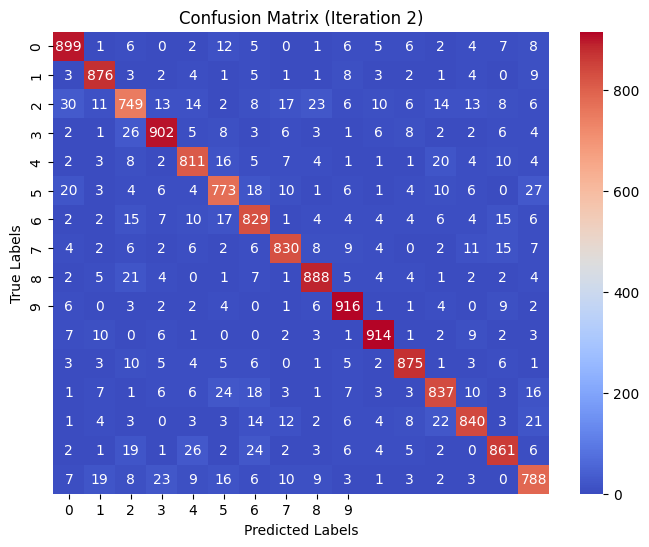


Classification Report (Iteration 2):
             precision recall f1-score   support
0                 0.91   0.93     0.92    964.00
1                 0.92   0.95     0.94    923.00
2                 0.85   0.81     0.83    930.00
3                 0.92   0.92     0.92    985.00
4                 0.89   0.90     0.90    899.00
5                 0.87   0.87     0.87    893.00
6                 0.87   0.89     0.88    930.00
7                 0.92   0.91     0.91    914.00
8                 0.93   0.93     0.93    951.00
9                 0.93   0.96     0.94    957.00
10                0.95   0.95     0.95    961.00
11                0.94   0.94     0.94    930.00
12                0.90   0.88     0.89    946.00
13                0.92   0.89     0.90    946.00
14                0.91   0.89     0.90    964.00
15                0.86   0.87     0.87    907.00
accuracy          0.91   0.91     0.91      0.91
macro avg         0.91   0.91     0.91  15000.00
weighted avg      0.91   0.91  

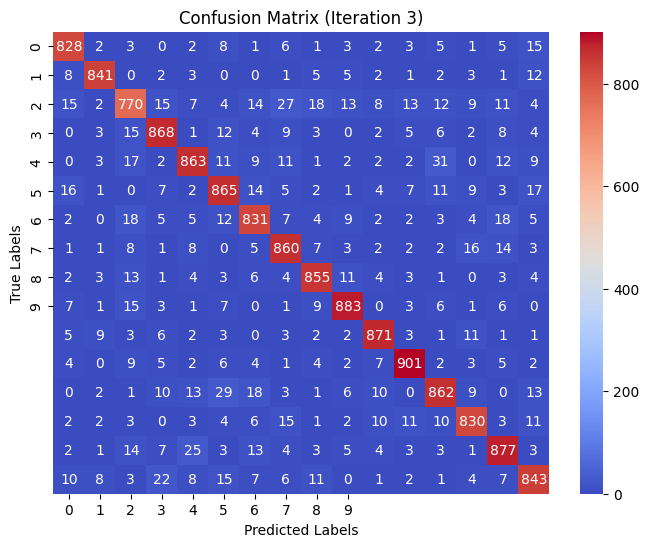


Classification Report (Iteration 3):
             precision recall f1-score   support
0                 0.92   0.94     0.93    885.00
1                 0.96   0.95     0.95    886.00
2                 0.86   0.82     0.84    942.00
3                 0.91   0.92     0.92    942.00
4                 0.91   0.89     0.90    975.00
5                 0.88   0.90     0.89    964.00
6                 0.89   0.90     0.89    927.00
7                 0.89   0.92     0.91    933.00
8                 0.92   0.93     0.93    917.00
9                 0.93   0.94     0.93    943.00
10                0.94   0.94     0.94    923.00
11                0.94   0.94     0.94    957.00
12                0.90   0.88     0.89    977.00
13                0.92   0.91     0.91    913.00
14                0.90   0.91     0.90    968.00
15                0.89   0.89     0.89    948.00
accuracy          0.91   0.91     0.91      0.91
macro avg         0.91   0.91     0.91  15000.00
weighted avg      0.91   0.91  

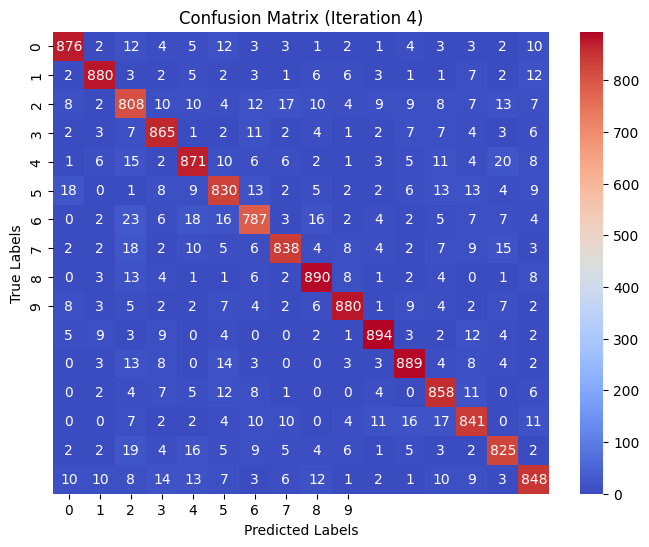


Classification Report (Iteration 4):
             precision recall f1-score   support
0                 0.94   0.93     0.93    943.00
1                 0.95   0.94     0.94    936.00
2                 0.84   0.86     0.85    938.00
3                 0.91   0.93     0.92    927.00
4                 0.90   0.90     0.90    971.00
5                 0.89   0.89     0.89    935.00
6                 0.89   0.87     0.88    902.00
7                 0.93   0.90     0.91    935.00
8                 0.93   0.94     0.93    944.00
9                 0.95   0.93     0.94    944.00
10                0.95   0.94     0.94    950.00
11                0.93   0.93     0.93    954.00
12                0.90   0.93     0.92    918.00
13                0.90   0.90     0.90    935.00
14                0.91   0.91     0.91    910.00
15                0.90   0.89     0.89    957.00
accuracy          0.91   0.91     0.91      0.91
macro avg         0.91   0.91     0.91  14999.00
weighted avg      0.91   0.91  

In [ ]:
kf = KFold(n_splits=4)

accuracy_scores_logisticRegression3 = []

X = dataset.drop('Personality', axis=1)
k = 1

for train_index, test_index in kf.split(dataset):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = dataset['Personality'].iloc[train_index], dataset['Personality'].iloc[test_index]

    # Create a logistic regression model
    logisticRegression3 = LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0, class_weight='balanced')

    # Fit the logistic regression model to the training data
    logisticRegression3.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = logisticRegression3.predict(X_test)

    accuracy_logisticRegression3 = accuracy_score(y_test, y_pred)

    # Print accuracy for the current iteration
    print(f"Accuracy in iteration {k} is {accuracy_logisticRegression3 * 100:.2f}%")
    print()

    accuracy_scores_logisticRegression3.append(accuracy_logisticRegression3)

    conf_matrix3 = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix
    print(f'Confusion Matrix (Iteration {k})')
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='coolwarm',
                xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (Iteration {k})')
    plt.show()
    print()

    class_report3 = classification_report(y_test, y_pred, output_dict=True)
    class_report_df3 = pd.DataFrame(class_report3).transpose()  # Convert to a DataFrame
    class_report_df3 = class_report_df3.applymap(lambda x: f'{x:.2f}' if isinstance(x, (float, int)) else x)  # Format to 2 decimal places
    # Print the classification report
    print(f'Classification Report (Iteration {k}):')
    print(class_report_df3)
    print()
    k += 1

avg_acc_logisticRegression3 = sum(accuracy_scores_logisticRegression3) / len(accuracy_scores_logisticRegression3)

# Print the average accuracy
print(f'Average accuracy : {avg_acc_logisticRegression3 * 100:.2f}%')



---



**5. Analysis of the obtained Result**

1. **Classifier Used:**

  - Section 3.1: Gaussian Naive Bayes - Default Parameters
  - Section 3.2: Gaussian Naive Bayes with Custom Priors
  - Section 3.3: Gaussian Naive Bayes with Feature Scaling
  - Section 4.1: Logistic Regression with 'lbfgs' Solver
  - Section 4.2: Logistic Regression with 'liblinear' Solver, Balanced Class Weights, and L1 Regularization
  - Section 4.3: Logistic Regression with 'lbfgs' Solver, Balanced Class Weights, and L2 Regularization

2. **Classifier Characteristics:**

  - Section 3 uses `Naive Bayes classifiers`, which assume feature independence.
  - Section 4 uses `Logistic Regression`, which models linear relationships between features and the target variable.

3. **Accuracies:**

  Here are the accuracies for each Section:

  1. Section 3.1: 91.04%
  2. Section 3.2: 90.08%
  3. Section 3.3: 91.00%
  4. Section 4.1: 89.41%
  5. Section 4.2: 91.32%
  6. Section 4.3: 90.01%

4. **Conclusions:**

  1. Section 3.1 (Gaussian Naive Bayes - Default), an accuracy of 91.04% was achieved. This result demonstrates capability of the Gaussian Naive Bayes algorithm to make accurate predictions.

  2. In Section 3.2 (Gaussian Naive Bayes with custom priors), an accuracy of 90.08% was achieved, showing that the custom priors do have an impact on model performance. It proved especially valuable showing prior domain knowledge favored specific class outcomes.

  3. Section 3.3 (Gaussian Naive Bayes Feature Scaling) achieved the lowest accuracy among all sections at 91.00%. This technique ensured that all features had comparable scales, enhancing the Gaussian Naive Bayes classifier's ability to make accurate predictions.

  4. In Section 4.1 (Logistic Regression with 'lbfgs' solver), the model achieved an accuracy of 89.41%, which is the lowest among all the models created for the given dataset.

  5. In Section 4.2 (Logistic Regression with 'liblinear' solver, balanced class weights, and L1 regularization), the model achieved the highest accuracy of 91.32%. This indicates that using L1 regularization and balancing class weights positively impacted the model's performance.

  6. Section 4.3 (Logistic Regression with 'lbfgs' solver, balanced class weights) achieved an accuracy of 90.01%. This result demonstrates the reliability of this logistic regression configuration.

These conclusions emphasize the importance of selecting the appropriate classifier and configuration based on the dataset's characteristics and the specific problem at hand. In this case, logistic regression with class-weight balancing and regularization (Sections 4.2 and 3.1.1) performed well, while Complement Naive Bayes (Section 3.2) demonstrated lower effectiveness.



---



**6. References:**

- [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)
- [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn-model-selection-kfold)
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
- [Scikit Learn Tutorial](https://www.tutorialspoint.com/scikit_learn/index.htm)
- [Scikit-Learn Tutorial | Machine Learning With Scikit-Learn](https://www.youtube.com/watch?v=0Lt9w-BxKFQ&ab_channel=Simplilearn)
- [Naive Bayes Classification Tutorial using Scikit-learn](https://www.datacamp.com/tutorial/naive-bayes-scikit-learn)
-[Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [Understanding Logistic Regression in Python Tutorial](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)
- [Logistic Regression 3-class Classifier](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#logistic-regression-3-class-classifier)




---

